<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`random в питоне является псевдо-рандомом и зависит от сида. Сид фиксируется для того, чтобы на разных машинах и у разных людей механизм рандома был одинаковым`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# task 1
random_samples = df_train.sample(n=10)
print(random_samples.to_string())

                                        name  year  selling_price  km_driven    fuel       seller_type transmission         owner     mileage   engine  max_power                 torque  seats
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000  Petrol        Individual       Manual   First Owner  23.01 kmpl   999 CC     67 bhp          91Nm@ 4250rpm    5.0
2943                      Maruti Wagon R LXI  2013         225000      58343  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0
2024                    Hyundai i20 Asta 1.2  2013         360000      30000  Petrol        Individual       Manual   First Owner   18.5 kmpl  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0
263                     Hyundai i20 1.2 Asta  2010         300000      70000  Petrol        Individual       Manual   First Owner   17.0 kmpl  1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0
4586        Skoda Octavia L and K 1.9 TD

In [4]:
# task 2
print(df_train.head().to_string())
print('\n...\n')
print(df_train.tail().to_string())

                            name  year  selling_price  km_driven    fuel seller_type transmission         owner     mileage   engine   max_power                    torque  seats
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm    5.0
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol  Individual       Manual   First Owne

In [5]:
# task 3
columns_with_passes = df_train.isnull().sum() + df_test.isnull().sum()
print(columns_with_passes[columns_with_passes > 0])
# список колонок с пропусками и их количество

mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64


In [6]:
# task 4
print('before cleaning')
print(df_train.shape)
after_cleaning = df_train.drop_duplicates()
print('after cleaning')
print(after_cleaning.shape)
# Так как количество строк изменилос, можно сделать вывод, что дубликаты имеются!

before cleaning
(6999, 13)
after cleaning
(6014, 13)


In [7]:
# bonus
# %pip install ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_train, title="Profiling Report")
# profile.to_notebook_iframe()

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [8]:
#task 5
# Пропуски в столбцах: mileage, engine, max_power, torque, seats
# Дальше в заданиях просят предобработать эти значения, так что приведём их к числам, а torque отбросим

# Пропуски до обработки
columns_with_passes = df_train.isnull().sum() + df_test.isnull().sum()
print(columns_with_passes[columns_with_passes > 0])
print('\n')

for df in [df_test, df_train]:
  for column in ['mileage', 'engine', 'max_power']:
    df[column] = df[column].str.extract(r"(\d+\.?\d*)").astype(float)
  df.drop(columns=['torque'], inplace=True)

df_test.fillna(df_test.median(numeric_only=True), inplace=True)
df_train.fillna(df_test.median(numeric_only=True), inplace=True)

# Пропуски после
# Пропуски до обработки
columns_with_passes = df_train.isnull().sum() + df_test.isnull().sum()
print(columns_with_passes[columns_with_passes > 0])

mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64


Series([], dtype: int64)


In [9]:
# df_train.info()

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
# task 6
df_duplicates = df_train.drop(columns='selling_price', inplace=False)
df_duplicates = df_duplicates[df_duplicates.duplicated()]
df_duplicates.shape
# 1159 дубликатов

(1159, 11)

In [11]:
# task 7
print(df_duplicates.to_string)

<bound method DataFrame.to_string of                                           name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner  mileage  engine  

In [12]:
# task 8
df_train_buff = df_train.copy() # это для задания 6
df_train.drop(columns=['selling_price'],inplace=True)
df_train.drop_duplicates(keep='first',inplace=True)
df_train_buff.drop_duplicates(keep='first',inplace=True)

In [13]:
# task 9
df_train.reset_index(drop=True, inplace=True)
df_train_buff.reset_index(drop=True, inplace=True)

In [14]:
df_train.head()
df_train.shape

(5840, 11)

In [15]:
# я так понимаю это ассерт из про группы, где torque делят на 2 столбца
# assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [16]:
# task 10, 11, 12
# сделал ранее

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [17]:
# task 13
for df in [df_train, df_test, df_train_buff]:
  for column in ['engine', 'seats']:
    df[column] = df[column].astype(int)


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
# task 14
print(f'Числовые столбцы трейна: \n{df_train.describe()}')
print(f'Числовые столбцы теста: \n{df_test.describe()}')
print('\n')
print(f'Категориальные столбцы трейна: \n{df_train.describe(include=["object"])}')
print(f'Категориальные столбцы теста: \n{df_test.describe(include=["object"])}')

Числовые столбцы трейна: 
              year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.429567  1429.448973    87.945439   
std       4.095622  6.007114e+04     3.985999   485.662834    31.633692   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.330000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  
count  5840.000000  
mean      5.426712  
std       0.982344  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000  
Числовые столбцы теста: 
              year  selling_price      km_driven      mileage      engine  \
count  

In [19]:
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

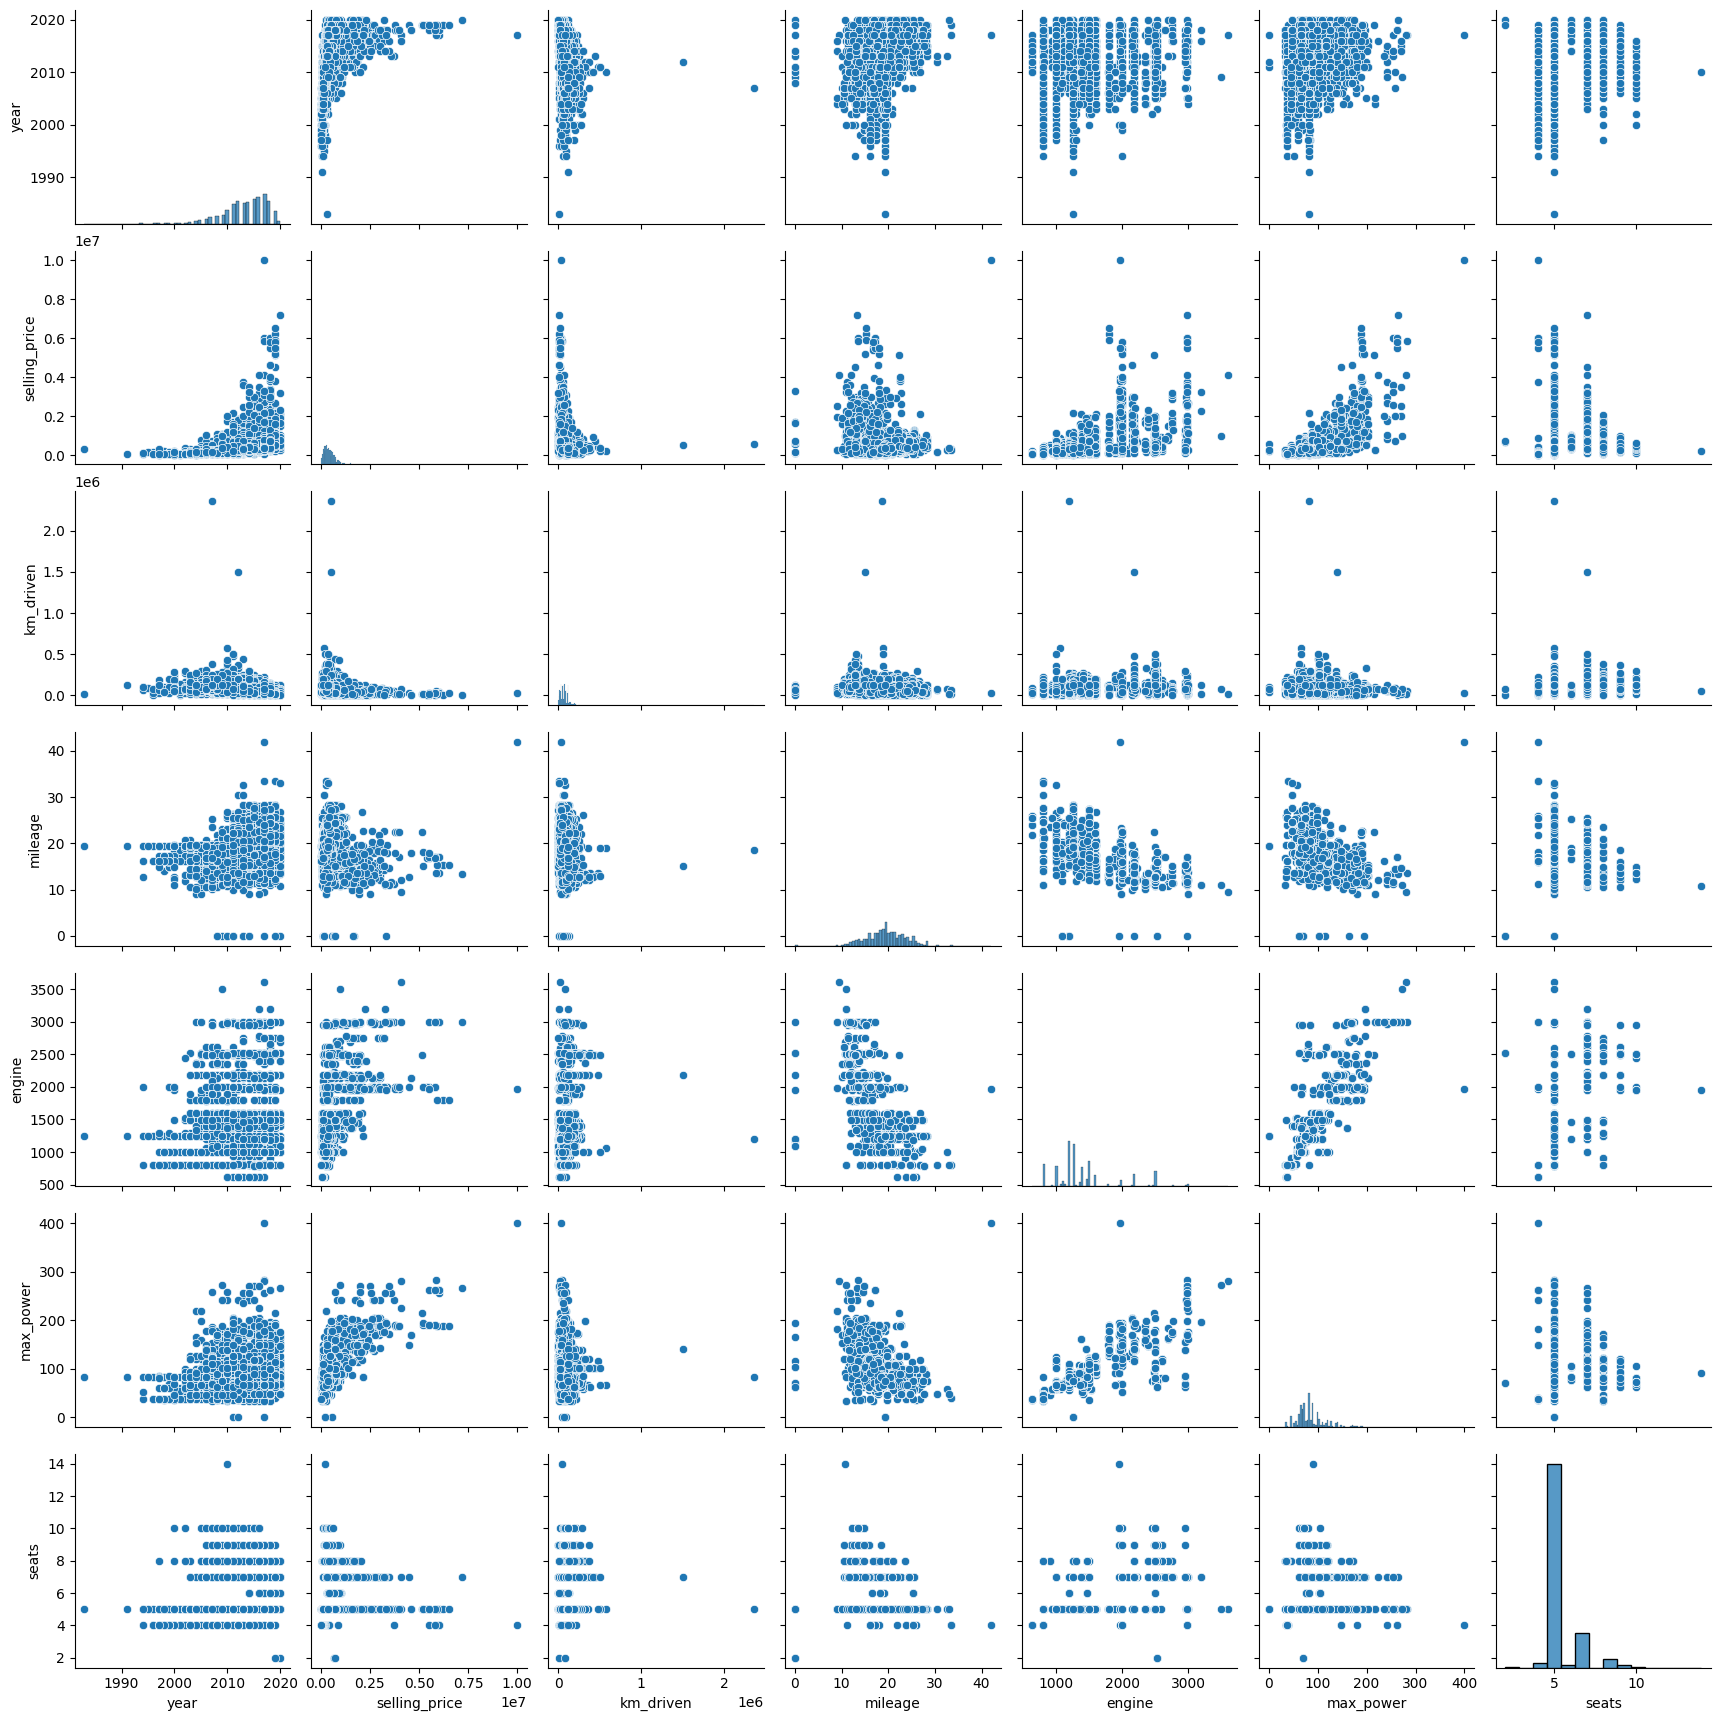

In [20]:
# task 15
# не очень понимаю как можно предположить на основе распределений связь с целевой переменной, если ранее её попросили удалить
# так что использую  df_train_buff
import seaborn as sns
sns.pairplot(df_train_buff)

# task 16
# Можно ли предположить на основе распределений связь признаков с целевой переменной?
# Да, например, признак year очевидно имеет экспоненциальную ну или какую-то другю неленельно прямопропорциональную зависимость)
# Это в принципе логично, чем машина новее - тем дороже.
# То же самое с engine и max_power
# Непонятно почему mileage с selling_price имеет что-то похожее на нормальное распределение чуть чуть сдвинутое вбок

# Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
# Да, например engine и max_power имеют что-то похожее на линейную зависимость

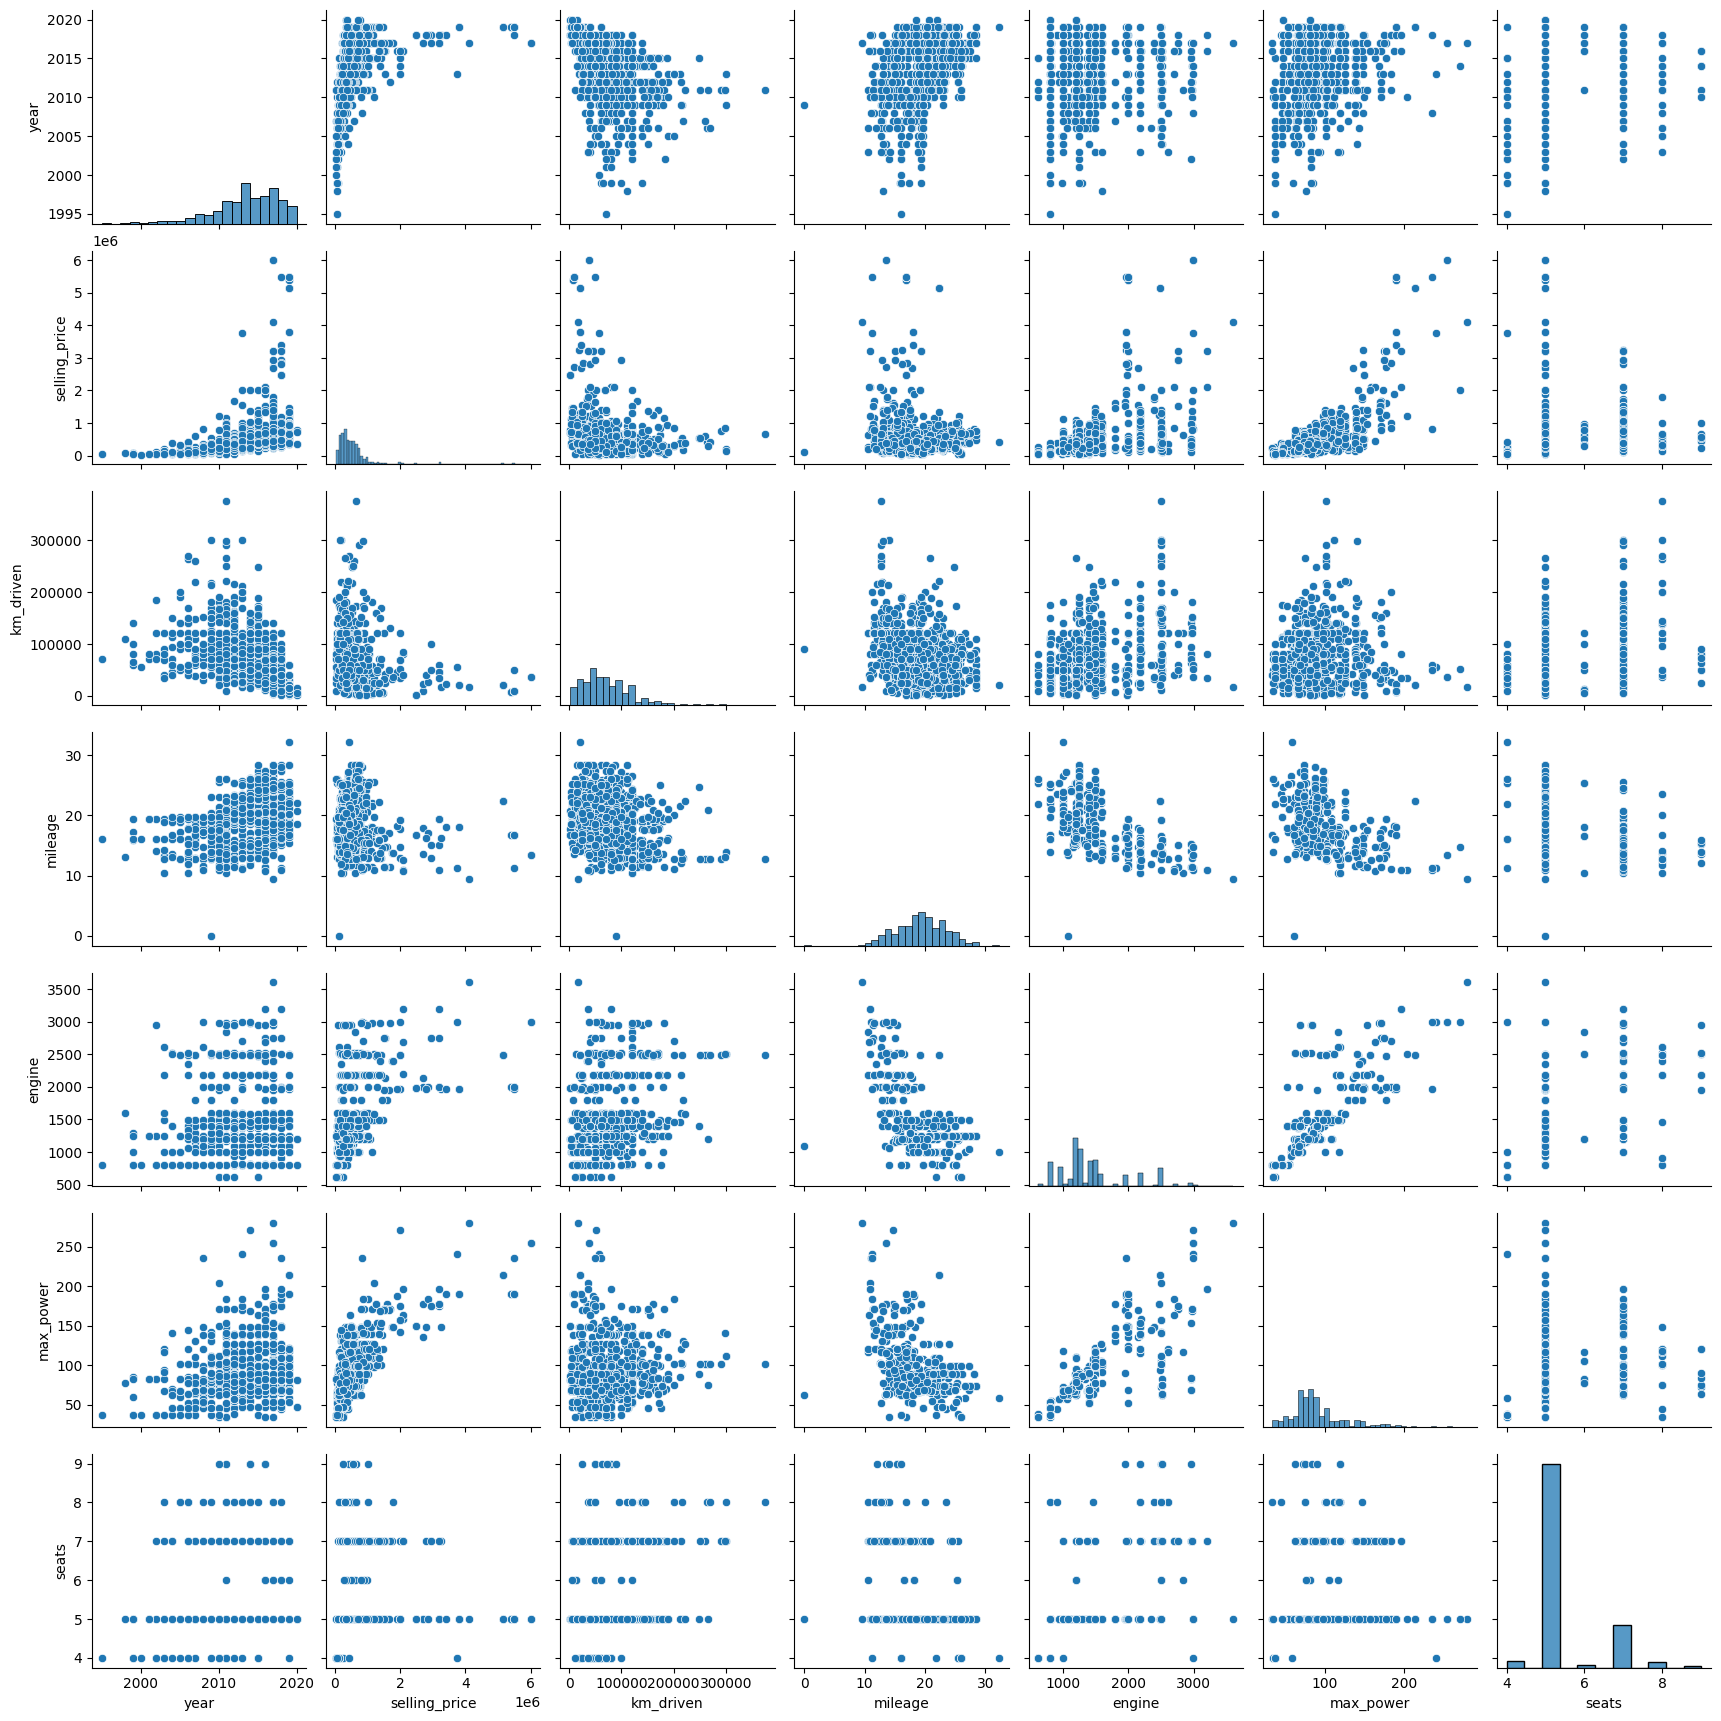

In [21]:
# task 17
sns.pairplot(df_test)
# task 18
# Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"
# Совокупности оказались похожими, но в тестовой выборке будто сильнее разброс, энтропия, если так можно сказать
# Лучше всего это видно на графике year/km_driven

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

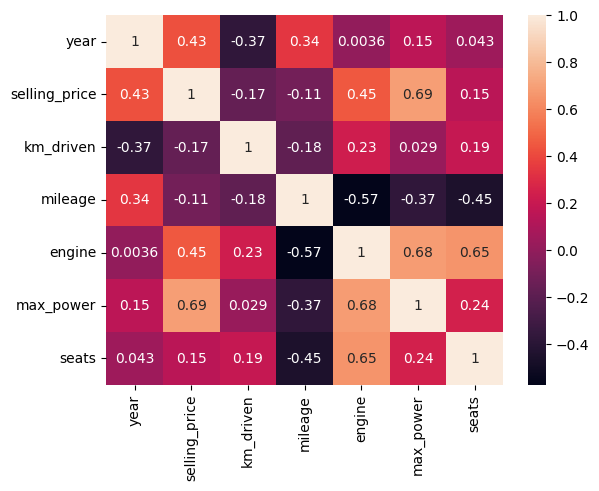

In [22]:
# task 19-20
sns.heatmap(df_train_buff.select_dtypes(include=['number']).corr(method='pearson'), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [23]:
# task 21
# 1.year/engine
# 2. selling_price/year, selling_price/engine, selling_price/max_power, engine/max_power, engine/seats
# 3. Да, т.к. мы имеем обратную корреляцию

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [24]:
# task 22
df_train_copy = df_train_buff.copy()

y_train = df_train_copy['selling_price']
X_train = df_train_copy.select_dtypes(include=['number']).drop(columns=['selling_price'])
print(X_train.shape)
print(y_train.shape)

(6014, 6)
(6014,)


In [25]:
# assert X_train.shape == (5840, 6)

In [26]:
df_test_copy = df_test.copy()

y_test = df_test_copy['selling_price']
X_test = df_test_copy.select_dtypes(include=['number']).drop(columns=['selling_price'])

In [27]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# task 23
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2_train: {r2_train}\nR2_test: {r2_test}")
print('\n')
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
print(f"MSE_train: {mse_train}\nMSE_test: {mse_test}")
# task 24
# Исходя из R2, точность модели ~60%, скорее всего можно улучшить в будущем
# Большой разброс между mse_train и mse_test почти в 2 раза может говорить о том,
# что наша модель переобучилась и лучше работает с тренировочной выборкой

R2_train: 0.5900470258798383
R2_test: 0.5940484483829611


MSE_train: 116812228839.46367
MSE_test: 233352544075.2079


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
# task 25
from sklearn.preprocessing import StandardScaler
from joblib import dump

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# Сохраняю скейлер для фастапи части
dump(scaler, 'scaler.joblib')
#
X_test = scaler.transform(X_test)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2_train: {r2_train}\nR2_test: {r2_test}")
print('\n')
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
print(f"MSE_train: {mse_train}\nMSE_test: {mse_test}")


R2_train: 0.590047025879838
R2_test: 0.5940484483829755


MSE_train: 116812228839.46373
MSE_test: 233352544075.19955


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [30]:
# task 26
print(df_train_copy.columns.tolist()[np.argmax(np.abs(linreg.coef_))])

fuel


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [31]:
# task 27
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2_train: {r2_train}\nR2_test: {r2_test}")
print('\n')
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
print(f"MSE_train: {mse_train}\nMSE_test: {mse_test}")
print('\n')
# task 28
print(lasso.coef_)
# Особо ничего не изменилос, коэффициенты не занулились. Для того, чтобы коэффициенты занулились они должны быть достаточно маленькими

R2_train: 0.5900470258443489
R2_test: 0.5940472637310085


MSE_train: 116812228849.57603
MSE_test: 233353225046.97873


[152756.70494101 -45106.08849248  27013.59347569  59887.25573853
 321174.37137459 -22795.07117248]


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [32]:
# task 29
from sklearn.model_selection import GridSearchCV

grid = {'alpha': np.arange(10000, 20000, 100)}

lasso = Lasso(max_iter=10000)
GSCV = GridSearchCV(estimator=lasso, param_grid=grid, cv=10)
GSCV_train = GSCV.fit(X_train, y_train)
print(GSCV_train.score(X_test, y_test))
GSCV.best_estimator_

0.5713999350368446


Lasso(alpha=19900, max_iter=10000)

In [33]:
# task 30
# 1. 10x100 = 1000
print(GSCV.best_estimator_.coef_)
# 2. Лучший коэф. = 19900, занулилось 2 параметра!

[149072.93778949 -22525.47477939      0.           1699.96544956
 325216.37467181     -0.        ]


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
# task 31
from sklearn.linear_model import ElasticNet

en = ElasticNet(max_iter=1000)
GSCV_en = GridSearchCV(en, {"alpha":np.arange(1, 10, 1),'l1_ratio':np.arange(0.1, 1, 0.01)}, cv = 10)
GSCV_en_model = GSCV_en.fit(X_train, y_train)

In [ ]:
# task 32
# В сетке по alpha 10 параметров, по l1_ratio тоже 10, 10 фолдов => 10^3 или 1000
print(GSCV_en_model.best_params_)
print(GSCV_en_model.best_score_)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# assert X_train_cat.shape == (5840, 10)

In [ ]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
# from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# OHED = pd.get_dummies(df_train, drop_first=True)
# OHED.head()

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [40]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# # your code here

In [41]:
df_train_copy.select_dtypes(include=['number']).drop(columns=['selling_price'])

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
6009,2008,191000,17.92,1086,62.10,5
6010,2013,50000,18.90,998,67.10,5
6011,2013,110000,18.50,1197,82.85,5
6012,2007,119000,16.80,1493,110.00,5


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

# def business_metric(y_true, y_pred):
#     # your code here

# business_metric(# your code here)

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [42]:
# экспортируем модель
# и веса
from joblib import dump
import pickle

dump(GSCV_en_model.best_estimator_, 'GSCV_model.joblib')
with open("GSCV_model.pickle", "wb") as file:
  pickle.dump(GSCV_en_model.best_estimator_, file)
coeffs = GSCV_en_model.best_estimator_.coef_
print(coeffs)

[142800.80738121 -46962.64178054  19501.20070952  81092.24823765
 268017.11102398 -23000.12018456]


In [43]:
!python3 -m pip install "fastapi[all]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 12.7 MB/s eta 0:00:00


In [44]:
%%writefile main.py

from pydantic import BaseModel
from fastapi.responses import FileResponse
from fastapi import FastAPI, File, UploadFile
from typing import List
import pandas as pd
import joblib
import re

app = FastAPI()
required_fields = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
scaler = joblib.load('scaler.joblib')
model = joblib.load('GSCV_model.joblib')

def extract_numeric(value):
    if isinstance(value, str):
        return float(re.search(r"[\d.]+", value).group())
    return float(value)

def preprocess_input(data: dict) -> List[float]:
    fields = required_fields
    return [extract_numeric(data.get(field)) for field in fields]

class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    features = preprocess_input(item.dict())
    prediction = model.predict(scaler.transform([features]))[0]
    return prediction

@app.post("/predict_items")
async def predict_items_csv(file: UploadFile = File(...)) -> FileResponse:
    data = pd.read_csv(file.file)
    for field in required_fields:
        data[field] = data[field].apply(extract_numeric)
    predictions = model.predict(scaler.transform(data[required_fields]))
    data["selling_price"] = predictions
    output_file = "predicted_items.csv"
    data.to_csv(output_file, index=False)
    return FileResponse(output_file, media_type="text/csv", filename="predicted_items.csv")

Writing main.py


In [ ]:
# !pip install uvicorn
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

34.23.255.130⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://fastapi.loca.lt
INFO:     Started server process [12384]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     178.176.36.185:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     178.176.36.185:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     178.176.36.185:0 - "POST /predict_items HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [12384]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

